K-Mean Cluster Analysis (Laptop)

In [27]:
#K-Means Cluster Analysis
#All variables are interval.

# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For plotting a graph
import seaborn as sns
%matplotlib inline
%config InlineBeckend.figure_format='retina'

#Display all results in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [28]:
# load dataset
Laptop = pd.read_csv("Laptop_v1.csv")
Laptop.head()

,Workaholic,Lifestyle,Learning,Product
0,6.426,4.410,1.764,A
1,6.174,3.780,1.764,A
2,5.922,4.032,1.638,A
3,5.796,3.906,1.890,A
4,6.300,4.536,1.764,A


In [29]:
Laptop.head()
Laptop.columns
Laptop.shape
Laptop.describe()

,Workaholic,Lifestyle,Learning,Product
0,6.426,4.410,1.764,A
1,6.174,3.780,1.764,A
2,5.922,4.032,1.638,A
3,5.796,3.906,1.890,A
4,6.300,4.536,1.764,A


Index(['Workaholic', 'Lifestyle', 'Learning', 'Product'], dtype='object')

(150, 4)

,Workaholic,Lifestyle,Learning
count,150.000000,150.000000,150.000000
mean,7.362600,3.852240,4.735080
std,1.043363,0.549192,2.224276
min,5.418000,2.520000,1.260000
25%,6.426000,3.528000,2.016000
50%,7.308000,3.780000,5.481000
75%,8.064000,4.158000,6.426000
max,9.954000,5.544000,8.694000


In [30]:
Laptop.Product.unique()
Laptop.Product.value_counts() #Count of Products

array(['A', 'B', 'C'], dtype=object)

B    50
C    50
A    50
Name: Product, dtype: int64

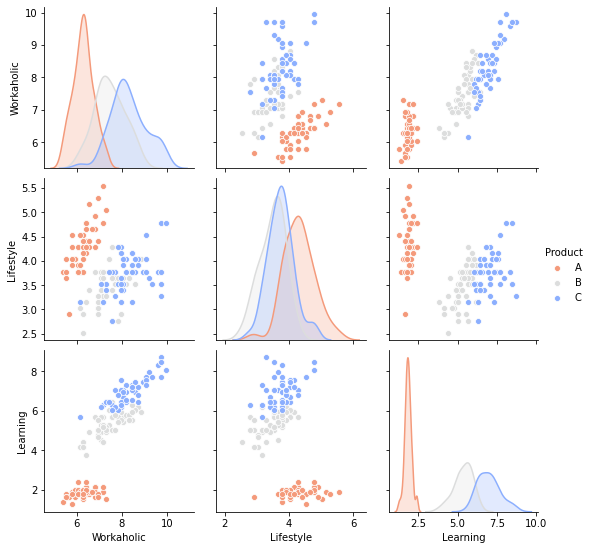

In [31]:
sns.pairplot(Laptop,hue='Product', palette = "coolwarm_r") #Color by Product

In [32]:
Laptop.groupby('Product').mean()

,Workaholic,Lifestyle,Learning
Product,,,
A,6.30756,4.31928,1.84212
B,7.47936,3.49020,5.36760
C,8.30088,3.74724,6.99552


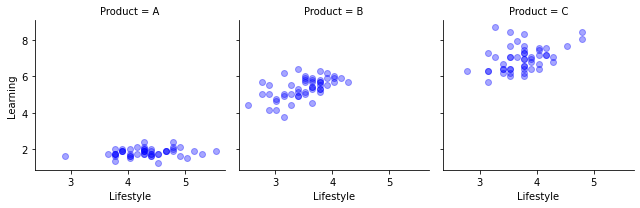

In [33]:
h=sns.FacetGrid(data=Laptop,col='Product')
h.map(plt.scatter,'Lifestyle','Learning',color='b',alpha=.35) #r= red, g = green

In [34]:
#Random 3 points to set centroids

#Lifestype varies from 2.52,5.54 random 3 points
rx=np.random.uniform(2.52,5.54,3) #np = numpy

rx

array([2.67127863, 3.72395138, 5.40596357])

In [35]:
#Random 3 points to set centroids

#Learning varies from 1.26-8.69 random 3 point
ry=np.random.uniform(1.26,8.69,3)

ry

array([3.6770295 , 2.34276021, 5.6611729 ])

[Text(0.5, 0, 'Lifestyle'),
 Text(0, 0.5, 'Learning'),
 Text(0.5, 1.0, 'Laptop Scatterplot')]

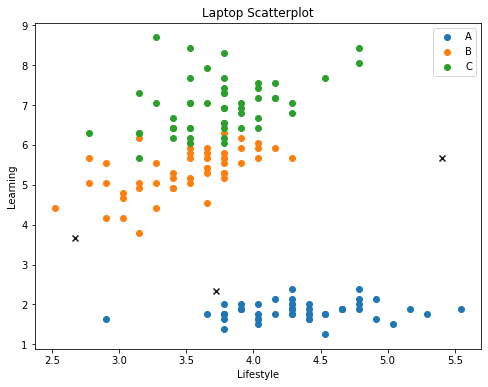

In [36]:
fig, ax = plt.subplots(figsize=(8,6))

for Product, Product_df in Laptop.groupby('Product'):
    ax.scatter(Product_df['Lifestyle'], Product_df['Learning'], label=Product);

ax.set(xlabel='Lifestyle', ylabel='Learning', title='Laptop Scatterplot');
ax.legend();
plt.scatter(rx,ry, color = '.1', marker ='x')

In [37]:
from sklearn.cluster import KMeans

In [40]:
X = Laptop.drop(['Product'], axis='columns') #,'Workaholic'
X.head()

,Workaholic,Lifestyle,Learning
0,6.426,4.410,1.764
1,6.174,3.780,1.764
2,5.922,4.032,1.638
3,5.796,3.906,1.890
4,6.300,4.536,1.764


In [46]:
#Using the Elbow Method to determine the optimal cluster
#SSD = Sum of Square Distance
#sum of squared distances of samples to their cloest cluster centroid (ssd) = inertia

ssd = []
K = range(1,8) #Change ranges of k
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    ssd.append(km.inertia_)

C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

Text(0.5, 0, 'Number of CLusters (k)')

Text(0, 0.5, 'Sum of Squared Distance')

Text(0.5, 1.0, 'Elbow Method for Optimal k')

<function matplotlib.pyplot.show(close=None, block=None)>

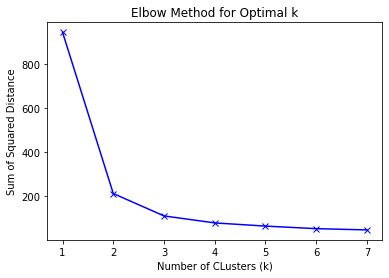

In [47]:
#Plotting the Elbow Curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of CLusters (k)')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method for Optimal k')
plt.show

#Thus, we should run 3 clusters

In [48]:
model=KMeans(n_clusters=3) #Optimal cluster = 3
model

KMeans(n_clusters=3)

In [49]:
X2 = Laptop.drop(['Product'], axis='columns')
X2.head()

model.fit(X2)

,Workaholic,Lifestyle,Learning
0,6.426,4.410,1.764
1,6.174,3.780,1.764
2,5.922,4.032,1.638
3,5.796,3.906,1.890
4,6.300,4.536,1.764


C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [17]:
#X = Laptop.drop(['Product','Workaholic'], axis='columns')
#X.head()

#model.fit(X)

,Lifestyle,Learning
0,4.410,1.764
1,3.780,1.764
2,4.032,1.638
3,3.906,1.890
4,4.536,1.764


C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [50]:
#Centroid
model.cluster_centers_

array([[8.613     , 3.861     , 7.125     ],
       [6.30756   , 4.31928   , 1.84212   ],
       [7.36665517, 3.44327586, 5.49837931]])

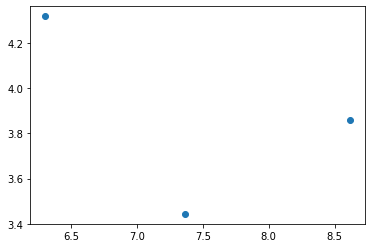

In [51]:
#plot centroid
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1])

[Text(0.5, 0, 'Lifestyle'),
 Text(0, 0.5, 'Learning'),
 Text(0.5, 1.0, 'Laptop Scatterplot')]

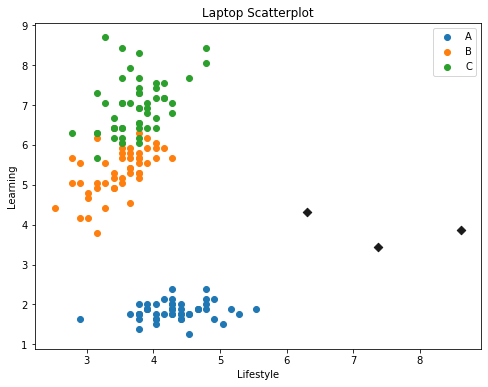

In [52]:
#plot centroid
fig, ax = plt.subplots(figsize=(8,6))

for Product, Product_df in Laptop.groupby('Product'):
    ax.scatter(Product_df['Lifestyle'], Product_df['Learning'], label=Product);

ax.set(xlabel='Lifestyle', ylabel='Learning', title='Laptop Scatterplot');
ax.legend();
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color = '.1', marker ='D')

In [53]:
#Generate cluster 0,1,2
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [54]:
Laptop['Product'].values

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C'], dtype=object)

In [66]:
Laptop['cluster']=model.labels_ #cluster from model
Laptop

,Workaholic,Lifestyle,Learning,Product,cluster
0,6.426,4.410,1.764,A,1
1,6.174,3.780,1.764,A,1
2,5.922,4.032,1.638,A,1
3,5.796,3.906,1.890,A,1
4,6.300,4.536,1.764,A,1
...,...,...,...,...,...
145,8.442,3.780,6.552,C,0
146,7.938,3.150,6.300,C,2
147,8.190,3.780,6.552,C,0
148,7.812,4.284,6.804,C,0


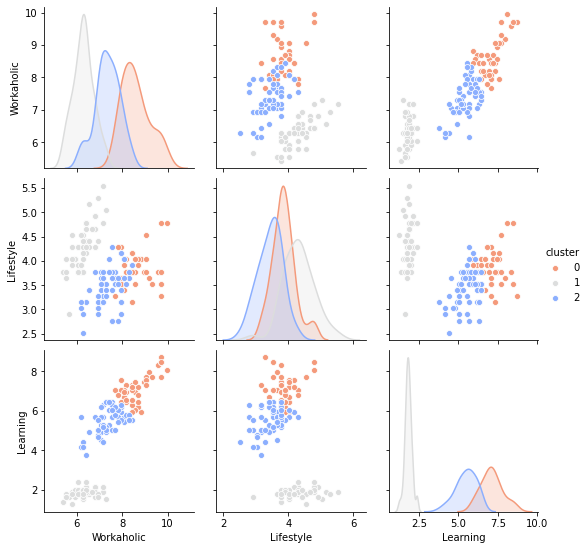

In [68]:
Laptop2 = Laptop.drop(['Product'], axis='columns')
sns.pairplot(Laptop2,hue='cluster', palette = "coolwarm_r") #Color by Product

In [57]:
Laptop.groupby('Product').mean()
Laptop.groupby('cluster').mean()

,Workaholic,Lifestyle,Learning,cluster
Product,,,,
A,6.30756,4.31928,1.84212,1.00
B,7.47936,3.49020,5.36760,1.80
C,8.30088,3.74724,6.99552,0.52


,Workaholic,Lifestyle,Learning
cluster,,,
0,8.613000,3.861000,7.125000
1,6.307560,4.319280,1.842120
2,7.366655,3.443276,5.498379


In [59]:
#confusion matrix
pd.crosstab(Laptop['Product'],Laptop['cluster'])

#Cluster 0 = Product C, Cluster 1 = Product A, Cluster 2 = Product B

cluster,0,1,2
Product,,,
A,0,50,0
B,5,0,45
C,37,0,13


In [65]:
#Prediction
model.predict([
    [6.410,4.464,1.22],
    [7.150,3.3,5.4],
    [8.780, 1.52,6.5]])

C:\Users\Tanikan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 2, 0])